In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [69]:

# Load your dataset
data = pd.read_csv('Parkisons Dataset 1 Final.csv')
df = data.drop('name', axis=1)
df = data.drop('status', axis=1)

# Extract the feature columns (exclude the last column if it's a label column)
feature_columns = df.columns[:-1]

# Calculate the mean (class centroid) for each class
centroid1 = df['HNR'].mean()
centroid2 = df['NHR'].mean()

# Calculate the spread (standard deviation) for each feature within each class
spread1 =df['NHR'].std()
spread2 =df['HNR'].std()

# Calculate the distance between mean vectors between classes
distance_between_classes = np.linalg.norm(centroid1 - centroid2)

# Print the results
print("Intraclass Spread (Standard Deviation) for Class 1:")
print(spread1)
print("\nIntraclass Spread (Standard Deviation) for Class 2:")
print(spread2)
print("\nInterclass Distance between Class 1 and Class 2:")
print(distance_between_classes)



Intraclass Spread (Standard Deviation) for Class 1:
0.04041844855606928

Intraclass Spread (Standard Deviation) for Class 2:
4.425764269063427

Interclass Distance between Class 1 and Class 2:
21.861127282051278


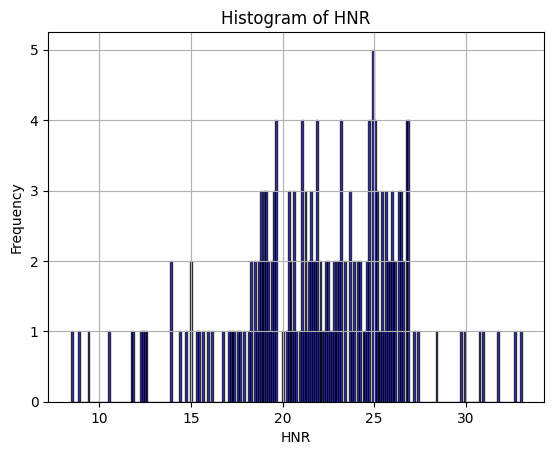

Mean of HNR: 21.885974358974355
Variance of HNR: 19.48694121472715


In [70]:


# Extract the values of the selected feature
feature_values = data['HNR']

# Define the number of bins (buckets) for the histogram
num_bins = 241  # Adjust the number of bins as needed

# Create a histogram using numpy.histogram
hist, bin_edges = np.histogram(feature_values, bins=241)

# Calculate the mean and variance of the feature
mean_value = np.mean(feature_values)
variance_value = np.var(feature_values)

# Plot the histogram
plt.hist(feature_values, bins=241, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('HNR')
plt.ylabel("Frequency")
plt.title(f"Histogram of {'HNR'}")
plt.grid(True)
plt.show()

# Print the calculated mean and variance
print(f"Mean of {'HNR'}: {mean_value}")
print(f"Variance of {'HNR'}: {variance_value}")


Minkowski Distance for r = 1: []
Minkowski Distance for r = 2: [8360.874000000005]
Minkowski Distance for r = 3: [8360.874000000005, 1313.6147605839392]
Minkowski Distance for r = 4: [8360.874000000005, 1313.6147605839392, 856.4257583844142]
Minkowski Distance for r = 5: [8360.874000000005, 1313.6147605839392, 856.4257583844142, 712.3530406726558]
Minkowski Distance for r = 6: [8360.874000000005, 1313.6147605839392, 856.4257583844142, 712.3530406726558, 643.5794669880345]
Minkowski Distance for r = 7: [8360.874000000005, 1313.6147605839392, 856.4257583844142, 712.3530406726558, 643.5794669880345, 604.1070031878645]
Minkowski Distance for r = 8: [8360.874000000005, 1313.6147605839392, 856.4257583844142, 712.3530406726558, 643.5794669880345, 604.1070031878645, 578.8670584321573]
Minkowski Distance for r = 9: [8360.874000000005, 1313.6147605839392, 856.4257583844142, 712.3530406726558, 643.5794669880345, 604.1070031878645, 578.8670584321573, 561.5058119800136]
Minkowski Distance for r = 1

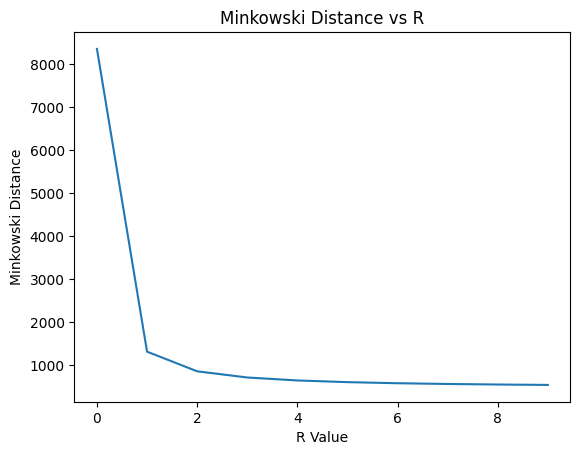

In [71]:
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

dist = []
for i in range(1,11):
  d = minkowski_distance(df.iloc[:,1], df.iloc[:,2], i)
  print("Minkowski Distance for r = " + str(i) + ": " + str(dist))
  dist.append(d)

plt.plot(dist)
plt.xlabel("R Value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs R")
plt.show()

Testing Accuracy of kNN (k=3): 1.00
Training Accuracy of kNN (k=3): 1.00
Predicted Class Labels for Test Vectors:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
True Class Labels for Test Vectors:
149    1
75     1
162    1
19     1
128    1
12     1
100    1
37     1
105    1
9      1
26     1
120    1
179    1
91     1
158    1
90     1
18     1
93     1
148    1
36     1
29     1
129    1
54     1
142    1
79     1
22     1
88     1
157    1
106    1
11     1
159    1
69     1
143    1
27     1
4      1
151    1
153    1
181    1
66     1
16     1
10     1
139    1
109    1
163    1
80     1
Name: status, dtype: int64


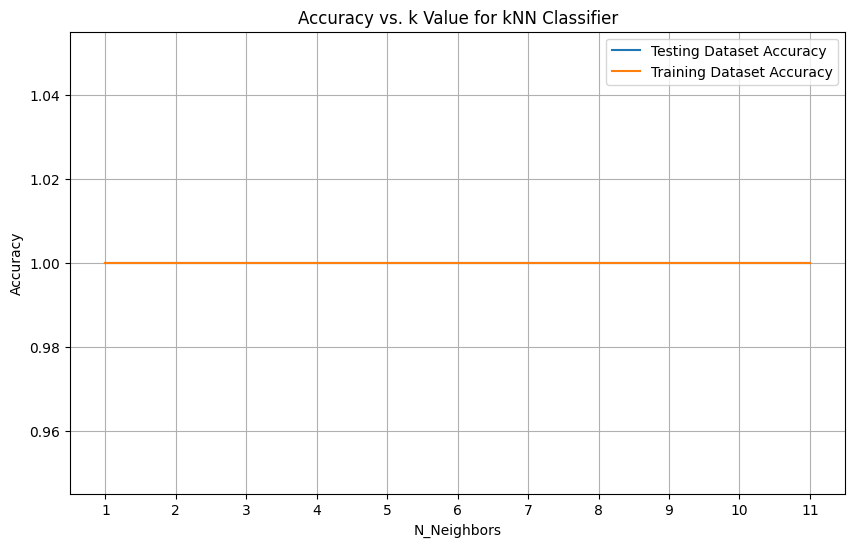

In [72]:
# Assuming you have a 'label' column that represents the class labels
# Specify the feature vectors (X) and the class labels (y)
X = data.drop('status', axis=1)  # Exclude the label column
X = data.drop('name', axis=1) #Exclude the name column
y = data['status']

# Ensure that you have only two classes (binary classification)
# If you have more than two classes, you can choose any two classes to work with
class1_label = 1
class2_label = 2

# Filter the dataset to include only the selected two classes
X = X[(y == class1_label) | (y == class2_label)]
y = y[(y == class1_label) | (y == class2_label)]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have X_train (training features), X_test (testing features), y_train (training labels), and y_test (testing labels)

# Train a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Test the accuracy of the kNN classifier
test_accuracy = neigh.score(X_test, y_test)
train_accuracy = neigh.score(X_train, y_train)

print(f"Testing Accuracy of kNN (k=3): {test_accuracy:.2f}")
print(f"Training Accuracy of kNN (k=3): {train_accuracy:.2f}")

# Use the predict() function to study prediction behavior
y_pred = neigh.predict(X_test)
print("Predicted Class Labels for Test Vectors:")
print(y_pred)
print("True Class Labels for Test Vectors:")
print(y_test)

#Make k = 1 to implement NN classifier and create an accuracy plot
k_values = range(1, 12)
test_accuracy_values = []
train_accuracy_values = []

for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    test_accuracy = neigh.score(X_test, y_test)
    train_accuracy = neigh.score(X_train, y_train)
    test_accuracy_values.append(test_accuracy)
    train_accuracy_values.append(train_accuracy)

#Create an accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracy_values, label='Testing Dataset Accuracy')
plt.plot(k_values, train_accuracy_values, label='Training Dataset Accuracy')
plt.legend()
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value for kNN Classifier')
plt.grid(True)
plt.xticks(k_values)
plt.show()


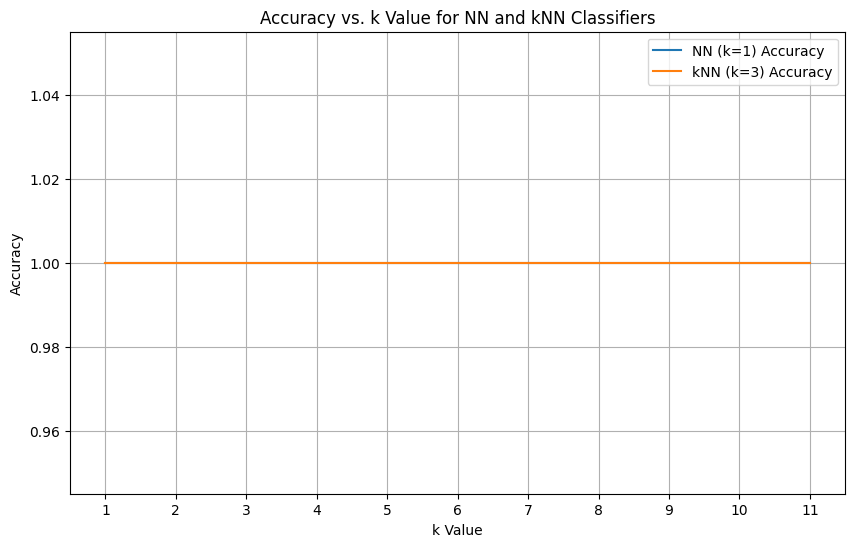

In [73]:
# Initialize lists to store accuracy values for NN (k=1) and kNN (k=3)
nn_accuracy_values = []
knn_accuracy_values = []

#Make k = 1 to implement NN classifier and create an accuracy plot
k_values = range(1, 12)

for k in k_values:
    # Nearest Neighbor (NN) Classifier (k=1)
    nn = KNeighborsClassifier(n_neighbors=1)
    nn.fit(X_train, y_train)
    nn_test_accuracy = nn.score(X_test, y_test)
    nn_accuracy_values.append(nn_test_accuracy)

    # k-Nearest Neighbors (kNN) Classifier (k=3)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    knn_test_accuracy = knn.score(X_test, y_test)
    knn_accuracy_values.append(knn_test_accuracy)

# Create an accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, nn_accuracy_values,label='NN (k=1) Accuracy')
plt.plot(k_values, knn_accuracy_values, label='kNN (k=3) Accuracy')
plt.legend()
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value for NN and kNN Classifiers')
plt.grid(True)
plt.xticks(k_values)
plt.show()


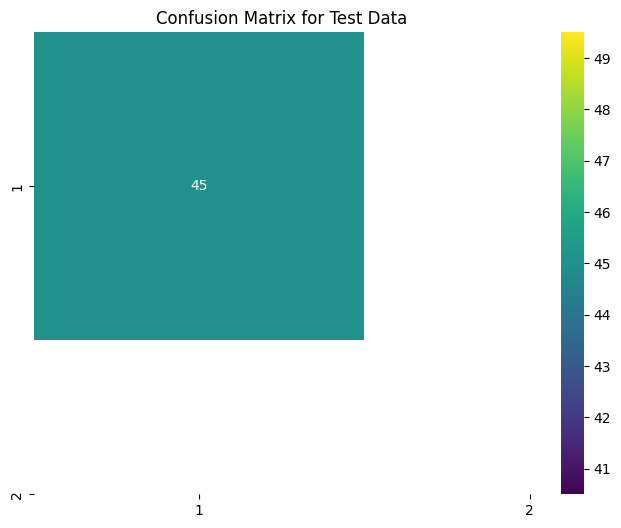


Precision for Test Data: 1.00
Recall for Test Data: 1.00
F1-Score for Test Data: 1.00


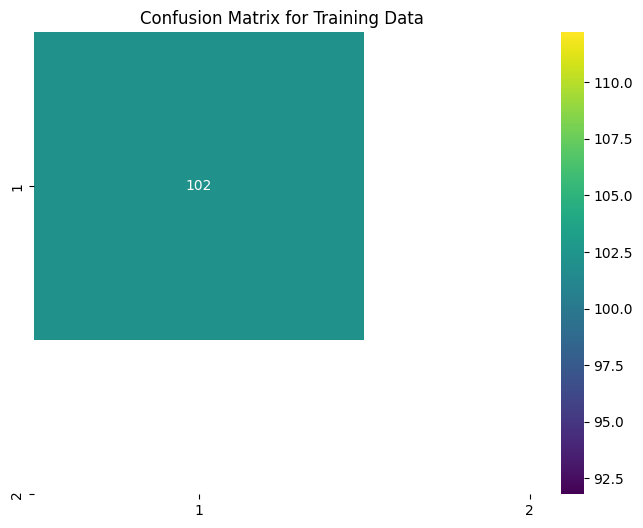


Precision for Training Data: 1.00
Recall for Training Data: 1.00
F1-Score for Training Data: 1.00


In [74]:

# Assuming you have already trained the kNN classifier (k=3) and made predictions for both test and training data
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

# Calculate the confusion matrix for the test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
# Calculate the confusion matrix for the training data
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)
# Create ConfusionMatrixDisplay objects with labels as needed (replace [False, True] with your class labels)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test, display_labels=[class1_label, class2_label])
cm_display_train = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_train, display_labels=[class1_label, class2_label])

# Plot the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="viridis", xticklabels=[class1_label, class2_label], yticklabels=[class1_label, class2_label])
plt.title('Confusion Matrix for Test Data')
plt.show()


print(f"\nPrecision for Test Data: {precision_test:.2f}")
print(f"Recall for Test Data: {recall_test:.2f}")
print(f"F1-Score for Test Data: {f1_score_test:.2f}")

# Plot the confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="viridis", xticklabels=[class1_label, class2_label], yticklabels=[class1_label, class2_label])
plt.title('Confusion Matrix for Training Data')
plt.show()


print(f"\nPrecision for Training Data: {precision_train:.2f}")
print(f"Recall for Training Data: {recall_train:.2f}")
print(f"F1-Score for Training Data: {f1_score_train:.2f}")


In [75]:
# Calculate accuracy on the training data
y_pred_train = knn.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate accuracy on the testing data
y_pred_test = knn.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred_test)

# Determine the model's fit based on accuracy
if training_accuracy > testing_accuracy:
    print("The model may be overfitting.")
elif training_accuracy < testing_accuracy:
    print("The model may be underfitting.")
else:
    print("The model appears to have a regular fit.")



The model appears to have a regular fit.
